In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X , y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

In [ ]:
X

array([[-0.80723584,  2.66946295],
       [ 1.9263585 ,  4.15243012],
       [-1.50016563,  3.10133251],
       ...,
       [ 0.41230223,  0.49159186],
       [-2.53294087,  2.09633244],
       [ 1.10777893,  1.14210712]])

In [ ]:
y

array([2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0,
       1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1,

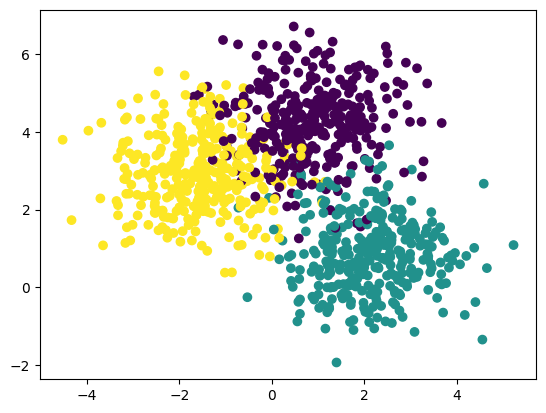

In [ ]:
plt.scatter(X[:,0], X[:,1] , c=y)

STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train_scalered = scaler.fit_transform(X_train)
X_test_scalered = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans

ELBOW METHOD

In [ ]:
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , init = "k-means++")
  kmeans.fit(X_train_scalered)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[1340.000000000001,
 658.3242072546169,
 379.33311388810546,
 322.7283318067869,
 269.5984528603789,
 220.81897680794887,
 198.59691019924463,
 179.4956422645052,
 152.284924924236,
 143.44701442863925]

PLOT ELBOW CURVE

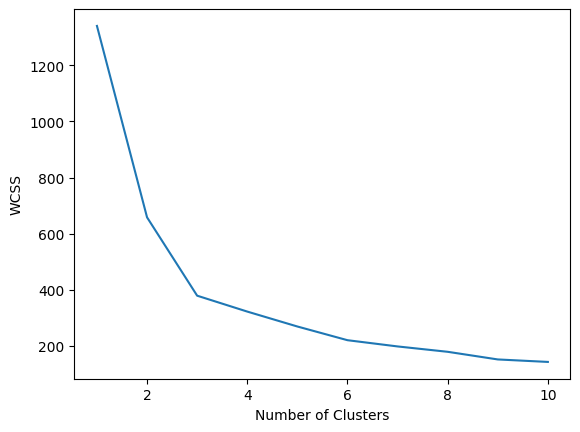

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3 , init = "k-means++")

In [ ]:
kmeans.fit_predict(X_train_scalered)

array([1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0,

In [ ]:
y_pred = kmeans.predict(X_test_scalered)

In [ ]:
y_pred

array([2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 2,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2,
       1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,

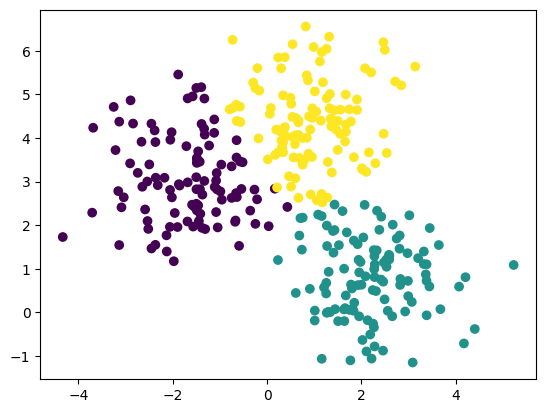

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1] , c=y_pred)

VALIDATING THE K VALUE

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [ ]:
kl.elbow

np.int64(3)

SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k , init = "k-means++")
  kmeans.fit(X_train_scalered)
  score = silhouette_score(X_train_scalered, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.46844804681330504),
 np.float64(0.46770372563519963),
 np.float64(0.4071338573245853),
 np.float64(0.34480586138136265),
 np.float64(0.35242315889616516),
 np.float64(0.35596376757191844),
 np.float64(0.32465494295814956),
 np.float64(0.34342226434279777),
 np.float64(0.33917090392766397)]

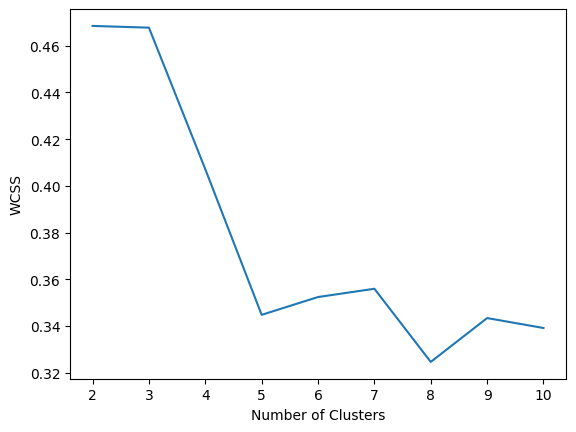

In [ ]:
plt.xticks(range(2,11))
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()